In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import datetime as dt

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.deterministic import DeterministicProcess
import pmdarima as pm

from tensorflow import keras
from keras import metrics, initializers
from tensorflow.keras.layers import Dropout,LSTM, GRU, BatchNormalization, Dense, Bidirectional, TimeDistributed
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
import matplotlib.image as mpimg
from sklearn.model_selection import GridSearchCV, KFold, LeaveOneOut
from sklearn.model_selection import cross_validate
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline
from scikeras.wrappers import KerasRegressor

from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D


from tensorflow.keras import callbacks
from keras.callbacks import ReduceLROnPlateau

from matplotlib import style
style.use('tableau-colorblind10')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
import scipy as sp
import sympy as smp
from skimage import color
from skimage import io
from scipy.fft import fftfreq
from scipy.fft import fft, ifft, fft2, ifft2

In [3]:
pd.options.display.max_columns = None
#pd.options.display.max_rows = None

In [4]:
df = pd.read_csv('Data/bitcoin without lag.csv', parse_dates=['datetime'], index_col=['datetime'])
#df = pd.read_csv('Data/Bitcoin preprocessed.csv', index_col=['datetime'])
df.head()

,high,low,open,volumefrom,volumeto,close,hourly_volume,top_tier_volume_quote,top_tier_volume_base,top_tier_volume_total,cccagg_volume_quote,cccagg_volume_base,cccagg_volume_total,total_volume_quote,total_volume_base,total_volume_total,eth_open,eth_close,bnb_open,bnb_close,usdt_open,usdt_close,sol_open,sol_close,hourly_return,3_hourly_return,5_hourly_return,12_hourly_return,3_hourly_volatility,5_hourly_volatility,12_hourly_volatility,daily_volatility,trend_score,Pos_score,Neg_score,Compound_score,Polarity,time_of_the_day,day,day_of_month,weekend
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-07-01 00:00:00,20817.65,19647.29,19908.49,6823.65,1.381081e+08,20262.66,143641.30,1.413396e+08,1.734342e+09,1.875681e+09,1.023345e+08,1.014878e+09,1.117212e+09,1.706061e+08,1.915078e+09,2.085684e+09,1069.53,1093.82,219.48,222.58,0.9992,0.9987,33.74,34.44,354.17,1464.85,1379.49,1072.73,493.599288,460.540694,348.583077,286.091957,100.0,0.090867,0.064867,0.115550,0.0,0.0,Friday,1,0
2022-07-01 01:00:00,20444.21,20231.53,20262.66,3183.32,6.471331e+07,20380.14,64012.17,6.423249e+07,8.010797e+08,8.653122e+08,4.611965e+07,4.423495e+08,4.884692e+08,8.518715e+07,8.941570e+08,9.793442e+08,1093.82,1095.07,222.58,225.22,0.9987,0.9985,34.44,34.87,117.48,1506.73,1646.43,1531.40,476.384009,411.796784,321.143744,286.846382,113.0,0.098000,0.066744,0.034856,0.0,1.0,Friday,1,0
2022-07-01 02:00:00,20504.52,20238.04,20380.14,2262.26,4.603065e+07,20266.86,48773.36,4.844529e+07,5.490071e+08,5.974524e+08,3.446238e+07,3.276693e+08,3.621317e+08,7.538542e+07,6.256688e+08,7.010542e+08,1095.07,1091.22,225.22,225.60,0.9985,0.9982,34.87,34.77,-113.28,358.37,1469.05,1165.98,233.731269,446.529586,325.557403,287.855508,92.0,0.132773,0.042909,0.103223,0.0,2.0,Friday,1,0
2022-07-01 03:00:00,20276.63,19668.22,20266.86,3603.45,7.212081e+07,19703.32,65925.93,5.869008e+07,8.222572e+08,8.809473e+08,4.438665e+07,4.956181e+08,5.400048e+08,7.742932e+07,9.239673e+08,1.001397e+09,1091.22,1053.55,225.60,220.97,0.9982,0.9980,34.77,33.61,-563.54,-559.34,829.91,583.05,346.355426,592.302312,377.555379,310.682042,90.0,0.109960,0.044840,0.166612,0.0,3.0,Friday,1,0
2022-07-01 04:00:00,19713.40,19352.87,19703.32,3932.58,7.685356e+07,19376.97,84503.60,7.795704e+07,2.074082e+09,2.152039e+09,5.267009e+07,6.085733e+08,6.612434e+08,1.007285e+08,2.285414e+09,2.386143e+09,1053.55,1048.59,220.97,219.20,0.9980,0.9981,33.61,32.55,-326.35,-1003.17,-531.52,257.76,225.237648,360.433506,392.813183,317.146276,97.0,0.093640,0.058400,0.132120,0.0,4.0,Friday,1,0


In [5]:
df = df.drop(['Pos_score', 'Neg_score'], axis = 1)

### Feature Engineering

In [6]:
df['day'].unique()

array(['Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday',
       'Thursday'], dtype=object)

In [7]:
df['day_of_week'] = 1
for i in range(len(df.index)):
    if df['day'][i] == 'Sunday':
        df['day_of_week'][i] = 1
    elif df['day'][i] == 'Monday':
        df['day_of_week'][i] = 2
    elif df['day'][i] == 'Tuesday':
        df['day_of_week'][i] = 3
    elif df['day'][i] == 'Wednesday':
        df['day_of_week'][i] = 4
    elif df['day'][i] == 'Thursday':
        df['day_of_week'][i] = 5
    elif df['day'][i] == 'Friday':
        df['day_of_week'][i] = 6
    elif df['day'][i] == 'Saturday':
        df['day_of_week'][i] = 7

In [8]:
#df.drop('day', axis = 1, inplace = True)
df['hourly_return'] = 0
for i in range(1, len(df.index)):
    df['hourly_return'][i] = df['close'][i] - df['close'][i-1]

In [9]:
df.head()

,high,low,open,volumefrom,volumeto,close,hourly_volume,top_tier_volume_quote,top_tier_volume_base,top_tier_volume_total,cccagg_volume_quote,cccagg_volume_base,cccagg_volume_total,total_volume_quote,total_volume_base,total_volume_total,eth_open,eth_close,bnb_open,bnb_close,usdt_open,usdt_close,sol_open,sol_close,hourly_return,3_hourly_return,5_hourly_return,12_hourly_return,3_hourly_volatility,5_hourly_volatility,12_hourly_volatility,daily_volatility,trend_score,Compound_score,Polarity,time_of_the_day,day,day_of_month,weekend,day_of_week
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-07-01 00:00:00,20817.65,19647.29,19908.49,6823.65,1.381081e+08,20262.66,143641.30,1.413396e+08,1.734342e+09,1.875681e+09,1.023345e+08,1.014878e+09,1.117212e+09,1.706061e+08,1.915078e+09,2.085684e+09,1069.53,1093.82,219.48,222.58,0.9992,0.9987,33.74,34.44,0.00,1464.85,1379.49,1072.73,493.599288,460.540694,348.583077,286.091957,100.0,0.115550,0.0,0.0,Friday,1,0,6
2022-07-01 01:00:00,20444.21,20231.53,20262.66,3183.32,6.471331e+07,20380.14,64012.17,6.423249e+07,8.010797e+08,8.653122e+08,4.611965e+07,4.423495e+08,4.884692e+08,8.518715e+07,8.941570e+08,9.793442e+08,1093.82,1095.07,222.58,225.22,0.9987,0.9985,34.44,34.87,117.48,1506.73,1646.43,1531.40,476.384009,411.796784,321.143744,286.846382,113.0,0.034856,0.0,1.0,Friday,1,0,6
2022-07-01 02:00:00,20504.52,20238.04,20380.14,2262.26,4.603065e+07,20266.86,48773.36,4.844529e+07,5.490071e+08,5.974524e+08,3.446238e+07,3.276693e+08,3.621317e+08,7.538542e+07,6.256688e+08,7.010542e+08,1095.07,1091.22,225.22,225.60,0.9985,0.9982,34.87,34.77,-113.28,358.37,1469.05,1165.98,233.731269,446.529586,325.557403,287.855508,92.0,0.103223,0.0,2.0,Friday,1,0,6
2022-07-01 03:00:00,20276.63,19668.22,20266.86,3603.45,7.212081e+07,19703.32,65925.93,5.869008e+07,8.222572e+08,8.809473e+08,4.438665e+07,4.956181e+08,5.400048e+08,7.742932e+07,9.239673e+08,1.001397e+09,1091.22,1053.55,225.60,220.97,0.9982,0.9980,34.77,33.61,-563.54,-559.34,829.91,583.05,346.355426,592.302312,377.555379,310.682042,90.0,0.166612,0.0,3.0,Friday,1,0,6
2022-07-01 04:00:00,19713.40,19352.87,19703.32,3932.58,7.685356e+07,19376.97,84503.60,7.795704e+07,2.074082e+09,2.152039e+09,5.267009e+07,6.085733e+08,6.612434e+08,1.007285e+08,2.285414e+09,2.386143e+09,1053.55,1048.59,220.97,219.20,0.9980,0.9981,33.61,32.55,-326.35,-1003.17,-531.52,257.76,225.237648,360.433506,392.813183,317.146276,97.0,0.132120,0.0,4.0,Friday,1,0,6


## Univariate Methods

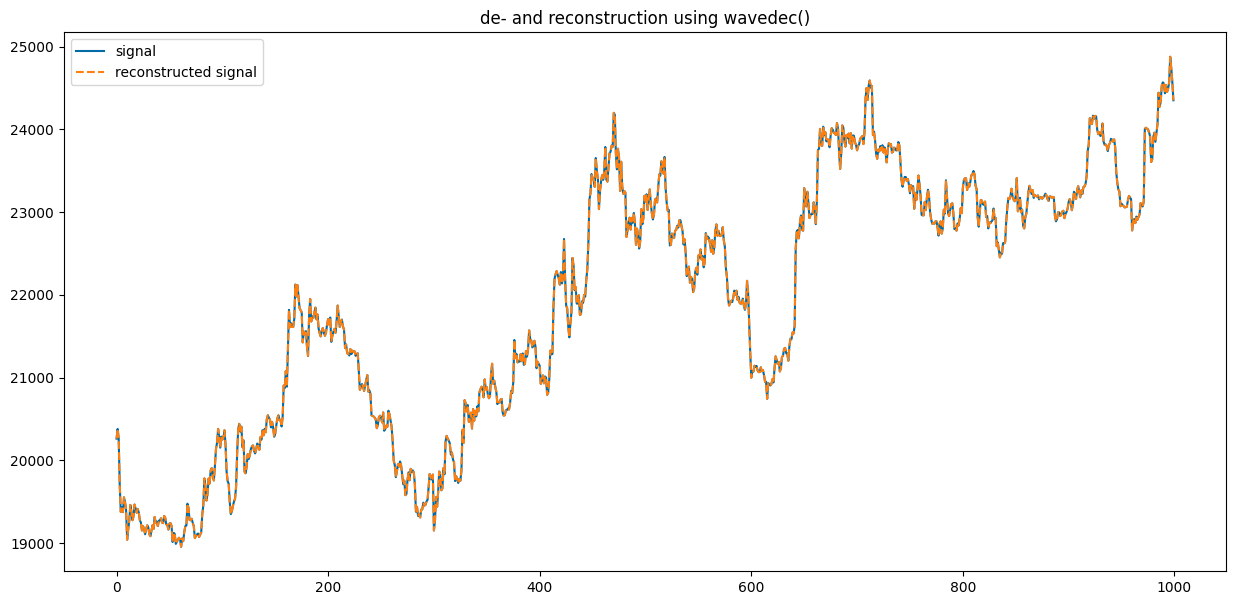

In [10]:
import pywt
coeffs = pywt.wavedec(df['close'].values, 'db2', level=8)
reconstructed_signal = pywt.waverec(coeffs, 'db2')

fig, ax = plt.subplots(figsize=(15,7))
ax.plot(df['close'].values[:1000], label='signal')
ax.plot(reconstructed_signal[:1000], label='reconstructed signal', linestyle='--')
ax.legend(loc='upper left')
ax.set_title('de- and reconstruction using wavedec()')
plt.show()

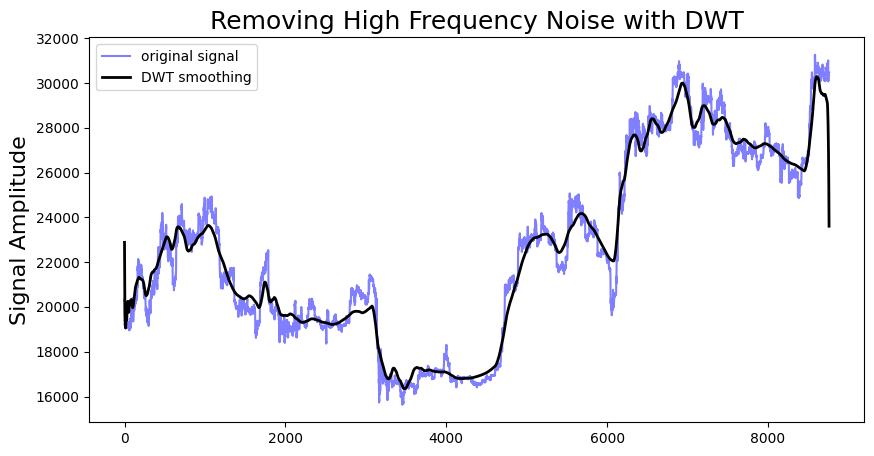

In [57]:
def lowpassfilter(signal = df['close'].values, thresh = 0.2, wavelet="db4"):
    thresh = thresh*np.nanmax(df['close'].values)
    coeff = pywt.wavedec(signal, wavelet, mode="per" )
    coeff[1:] = (pywt.threshold(i, value=thresh, mode="soft" ) for i in coeff[1:])
    reconstructed_signal = pywt.waverec(coeff, wavelet, mode="per" )
    return reconstructed_signal
 
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(df['close'].values, color="b", alpha=0.5, label='original signal')
rec = lowpassfilter(df['close'].values, 0.2)
ax.plot(rec, 'k', label='DWT smoothing', linewidth=2)
ax.legend()
ax.set_title('Removing High Frequency Noise with DWT', fontsize=18)
ax.set_ylabel('Signal Amplitude', fontsize=16)
plt.show()

In [58]:
new_df = df[['close']]
new_df['trend'] = rec
new_df['resid'] = new_df['close'] - new_df['trend']

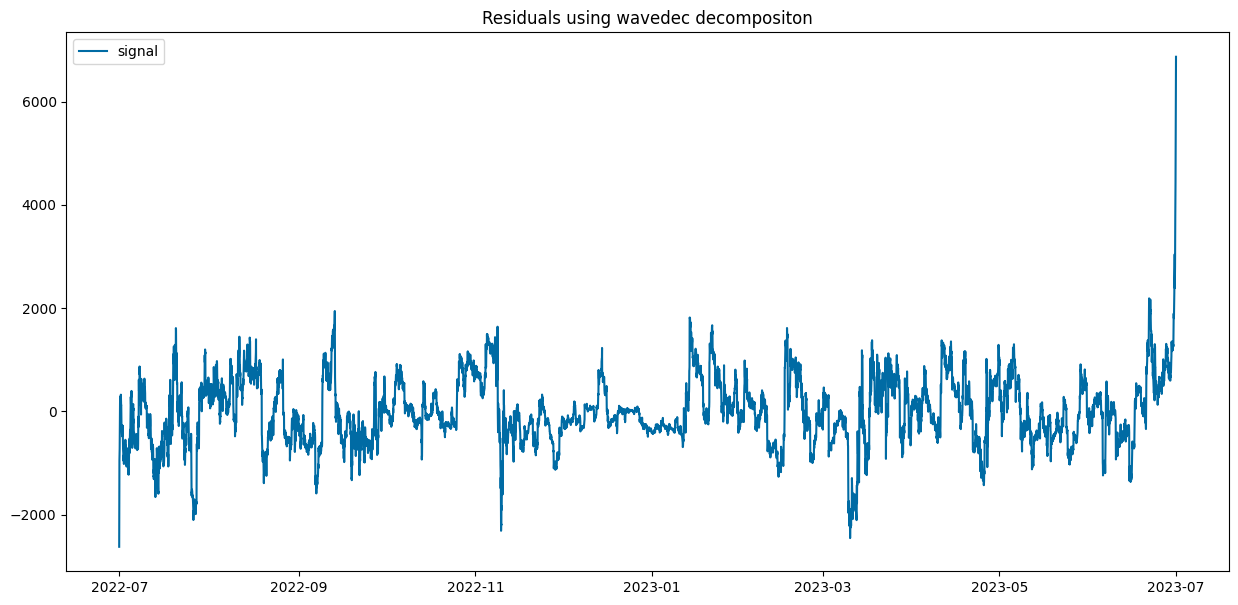

In [60]:
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(new_df['resid'], label='signal')
ax.legend(loc='upper left')
ax.set_title('Residuals using wavedec decompositon')
plt.show()

In [61]:
new_df['close'] = new_df['close'].shift(-1)
new_df = new_df.dropna()

In [62]:
trend = new_df['trend'].values
resid = new_df['resid'].values
y = new_df['close'].values

trend_X_train, trend_X_test, y_train, y_test = train_test_split(trend, y, test_size = 500, shuffle = False)
resid_X_train, resid_X_test = train_test_split(resid, test_size = 500, shuffle = False)

trend_X_train = trend_X_train.reshape(-1, 1)
trend_X_test = trend_X_test.reshape(-1, 1)
resid_X_train = resid_X_train.reshape(-1, 1)
resid_X_test = resid_X_test.reshape(-1, 1)

y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [63]:
# Fit trend model
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=False)
model.fit(trend_X_train, y_train)

LinearRegression(fit_intercept=False)

In [64]:
y_fit = model.predict(trend_X_train)
y_pred = model.predict(trend_X_test)

In [65]:
y_pred.shape

(500, 1)

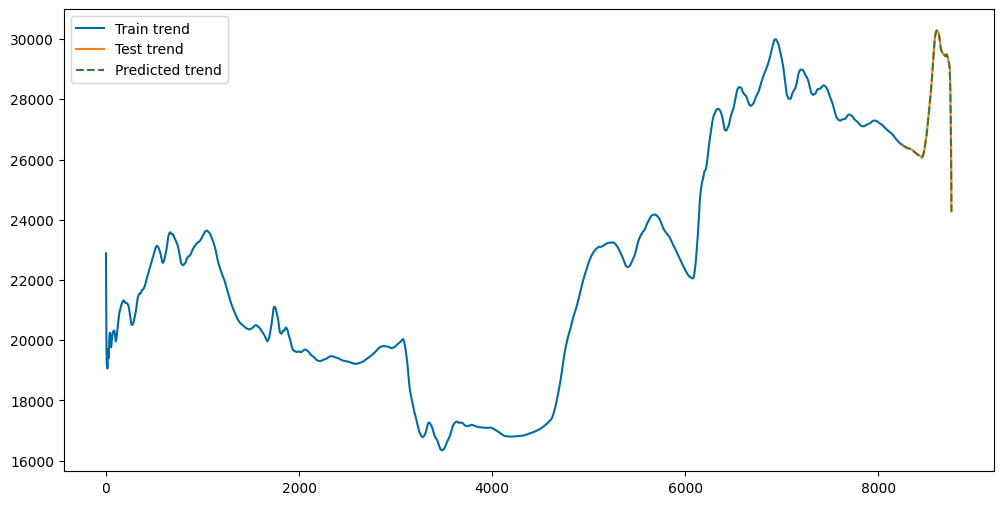

In [66]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(np.arange(0, len(new_df.index) - 500), trend_X_train[:len(new_df.index) - 500], label = 'Train trend');
ax.plot(np.arange(len(new_df.index) - 500, len(new_df.index)), trend_X_test, label = 'Test trend');
#ax.plot(np.arange(0, len(df.index) - 500), y_fit, linestyle='--', color='#ff7823');
ax.plot(np.arange(len(new_df.index) - 500, len(new_df.index)), y_pred, linestyle='--', color='#3c763d', label = 'Predicted trend'); 
ax.legend();
ax.set_title("");

In [21]:
# MDAPE
import statistics
from sklearn.metrics import mean_squared_error, r2_score

def MAPE(actual, pred):
    assert len(actual) == len(pred), "Input arrays must have the same length."
    absolute_errors = np.abs((actual - pred) / actual)
    mdape = np.mean(absolute_errors) * 100.0

    return mdape

def rmse(actual, pred):
    return np.sqrt(mean_squared_error(actual, pred))

In [22]:
rmse(trend_X_test, y_pred)

2.0591910648844705

In [23]:
# Create residuals (the collection of detrended series) from the training set
y_resid = y_train - y_fit

In [24]:
# Train XGBoost on the residuals
xgb = LinearRegression()
xgb.fit(resid_X_train, y_resid)

LinearRegression()

In [25]:
# Add the predicted residuals onto the predicted trends
y_pred_boosted = xgb.predict(resid_X_test).reshape(-1, 1) + y_pred

In [26]:
from sklearn.metrics import r2_score
rmse_error = rmse(y_test, y_pred_boosted)
mape_error = MAPE(y_test, y_pred_boosted)
r2 = r2_score(y_test, y_pred_boosted)

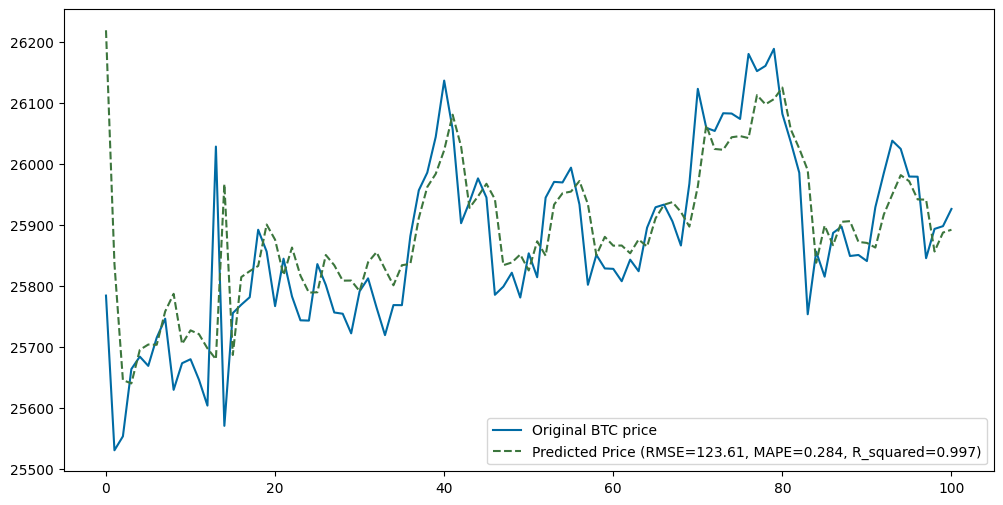

In [27]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(y_test[0:101], label = 'Original BTC price');
ax.plot(y_pred_boosted[0:101], linestyle='--', color='#3c763d',
        label="Predicted Price (RMSE={:0.2f}, MAPE={:0.3f}, R_squared={:0.3f})".format(rmse_error, float(mape_error), r2)); 
ax.legend();
ax.set_title("");

##### Search for model combination

In [28]:
def hybrid(model1, model2):
    model1.fit(trend_X_train, y_train)
    y_fit = model1.predict(trend_X_train)
    y_pred = model1.predict(trend_X_test)

    y_resid = y_train - y_fit.reshape(-1, 1)

    model2.fit(resid_X_train, y_resid)
    y_pred_boosted = model2.predict(resid_X_test).reshape(-1, 1) + y_pred.reshape(-1, 1)
    
    return y_pred_boosted, rmse(y_test, y_pred_boosted), MAPE(y_test, y_pred_boosted), r2_score(y_test, y_pred_boosted)

In [29]:
# list of all models
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

regressor1 = LinearRegression()
regressor2 = Ridge()
svr = SVR()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()
gb = GradientBoostingRegressor()
xgb = XGBRegressor()
voting = VotingRegressor([('LR', regressor1), ('Ridge', regressor2), ('svr', svr), ('KNN', knn), ('dt', dt), ('rf', rf),
                          ('gb', gb), ('xgb', xgb)])

In [31]:
model_list = [regressor1, regressor2, svr, knn, dt, rf, gb, xgb, voting]
error_list = []
combination = []

for i in model_list:
    for j in model_list:
        print('Iteration started: ', str(len(error_list) + 1))
        #print('Training started with: ', i, ', ', j)
        point1, rmse_error, mdape_error, r2 = hybrid(i, j)
        error_list.append(rmse_error)
        combination.append([i, j])
        
ind = error_list.index(min(error_list))
best_combo = combination[ind]
print("==========Hybrid Model Combination search result==========")
print("Best error: ", str(error_list[ind]), ', with combination: ', best_combo)

Iteration started:  1
Iteration started:  2
Iteration started:  3
Iteration started:  4
Iteration started:  5
Iteration started:  6
Iteration started:  7
Iteration started:  8
Iteration started:  9
Iteration started:  10
Iteration started:  11
Iteration started:  12
Iteration started:  13
Iteration started:  14
Iteration started:  15
Iteration started:  16
Iteration started:  17
Iteration started:  18
Iteration started:  19
Iteration started:  20
Iteration started:  21
Iteration started:  22
Iteration started:  23
Iteration started:  24
Iteration started:  25
Iteration started:  26
Iteration started:  27
Iteration started:  28
Iteration started:  29
Iteration started:  30
Iteration started:  31
Iteration started:  32
Iteration started:  33
Iteration started:  34
Iteration started:  35
Iteration started:  36
Iteration started:  37
Iteration started:  38
Iteration started:  39
Iteration started:  40
Iteration started:  41
Iteration started:  42
Iteration started:  43
Iteration started:  

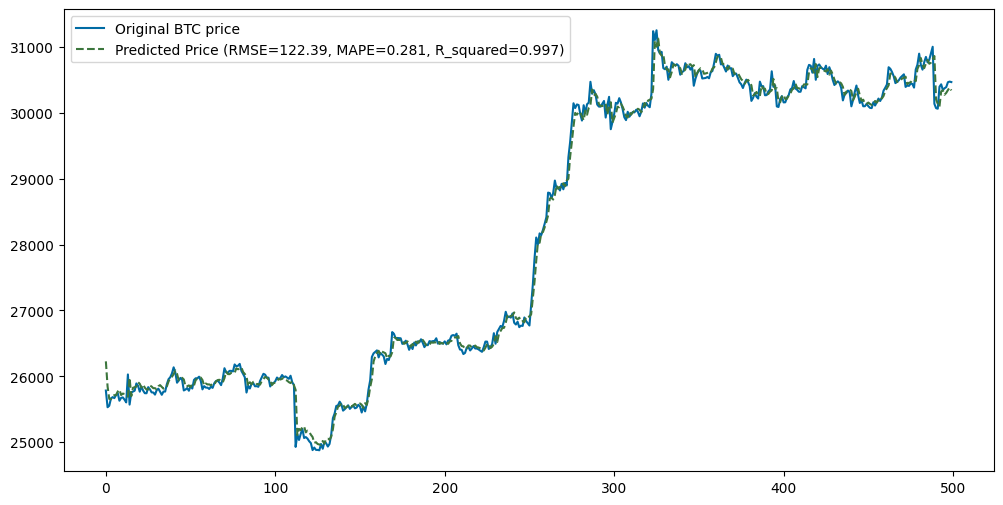

In [32]:
predicted_value, rmse_error, mape_error, r2 = hybrid(LinearRegression(), LinearRegression())

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(y_test, label = 'Original BTC price');
ax.plot(predicted_value, linestyle='--', color='#3c763d',
        label="Predicted Price (RMSE={:0.2f}, MAPE={:0.3f}, R_squared={:0.3f})".format(rmse_error, float(mape_error), r2)); 
ax.legend();
ax.set_title("");

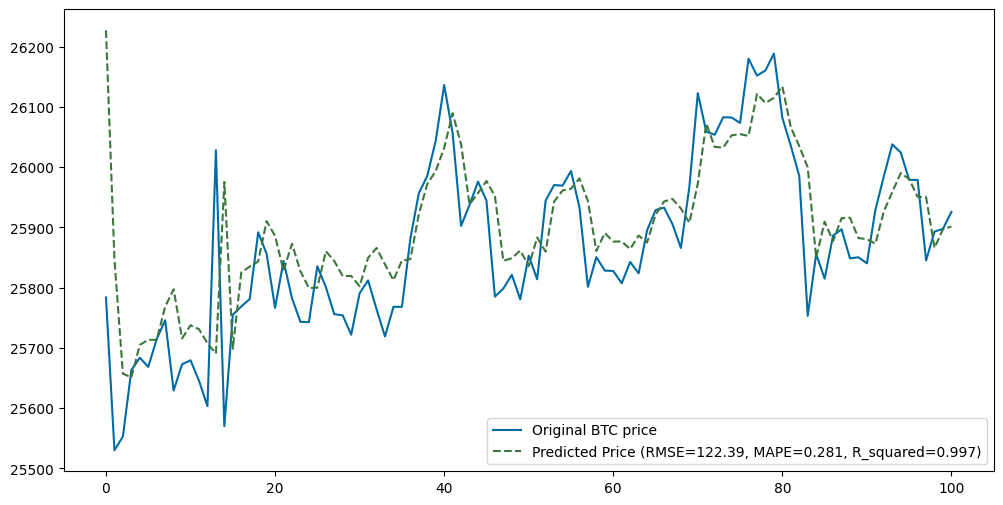

In [33]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(y_test[0:101], label = 'Original BTC price');
ax.plot(predicted_value[0:101], linestyle='--', color='#3c763d',
        label="Predicted Price (RMSE={:0.2f}, MAPE={:0.3f}, R_squared={:0.3f})".format(rmse_error, float(mape_error), r2)); 
ax.legend();
ax.set_title("");

### Deep learning

##### ANN

In [34]:
with tf.device('/cpu:0'):
    # Create sequential model from tensorflow.keras
    ANN_model1 = tf.keras.models.Sequential()
    # Add a hidden layer with input dimensions, neurons and activation function
    ANN_model1.add(Dense(units = 4, input_dim = 1, activation = 'relu',
                         activity_regularizer = tf.keras.regularizers.L2(l2 = 0)))

    # Add output layer with one 1 ouput neuron as this is regression problem
    ANN_model1.add(Dense(1, activation = 'linear'))

    # Compile the model with optimizer and loss function
    ANN_model1.compile(optimizer = Adam(0.0005), loss = 'mse')
    
    # Create sequential model from tensorflow.keras
    ANN_model2 = tf.keras.models.Sequential()
    # Add a hidden layer with input dimensions, neurons and activation function
    ANN_model2.add(Dense(units = 4, input_dim = 1, activation = 'relu',
                         activity_regularizer = tf.keras.regularizers.L2(l2 = 0)))
    
    # Add output layer with one 1 ouput neuron as this is regression problem
    ANN_model2.add(Dense(1, activation = 'linear'))

    # Compile the model with optimizer and loss function
    ANN_model2.compile(optimizer = Adam(0.0005), loss = 'mse')

In [35]:
# Define early stopping and learning rate reduction criteria
callback = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 5, verbose = 1)
REDUCE_LR = callbacks.ReduceLROnPlateau(monitor = 'val_loss',
                                        patience = 2,
                                        factor = 0.5,
                                        min_lr = 1e-6,
                                        verbose = 0)

In [36]:
def hybrid_dl(model1, model2, batch_size = 16, callbacks = [callback, REDUCE_LR]):
    history = model1.fit(trend_X_train, y_train, epochs = 500, batch_size = batch_size, validation_split = 0.2, shuffle = False,
                        callbacks = callbacks)
    y_fit = model1.predict(trend_X_train)
    y_pred = model1.predict(trend_X_test)

    y_resid = y_train - y_fit.reshape(-1, 1)

    history = model2.fit(resid_X_train, y_resid, epochs = 500, batch_size = batch_size, validation_split = 0.2, shuffle = False,
                        callbacks = callbacks)
    y_pred_boosted = model2.predict(resid_X_test).reshape(-1, 1) + y_pred.reshape(-1, 1)
    
    return y_pred_boosted, rmse(y_test, y_pred_boosted), MAPE(y_test, y_pred_boosted), r2_score(y_test, y_pred_boosted)

In [37]:
predicted_value, rmse_error, mdape_error, r2 = hybrid_dl(ANN_model1, ANN_model2, batch_size = 32,
                                                         callbacks = [callback, REDUCE_LR])

Epoch 1/500
207/207 [==============================] - 3s 5ms/step - loss: 82686.2500 - val_loss: 21193.6504 - lr: 5.0000e-04
Epoch 2/500
207/207 [==============================] - 1s 4ms/step - loss: 20231.7305 - val_loss: 22294.9180 - lr: 5.0000e-04
Epoch 3/500
207/207 [==============================] - 1s 4ms/step - loss: 20351.2266 - val_loss: 22774.9512 - lr: 5.0000e-04
Epoch 4/500
207/207 [==============================] - 1s 4ms/step - loss: 20219.5664 - val_loss: 21356.6953 - lr: 2.5000e-04
Epoch 5/500
207/207 [==============================] - 1s 4ms/step - loss: 20210.9922 - val_loss: 21722.6953 - lr: 2.5000e-04
Epoch 6/500
207/207 [==============================] - 1s 4ms/step - loss: 20110.6094 - val_loss: 20360.2324 - lr: 1.2500e-04
Epoch 7/500
207/207 [==============================] - 1s 4ms/step - loss: 20059.5195 - val_loss: 20438.6289 - lr: 1.2500e-04
Epoch 8/500
207/207 [==============================] - 1s 4ms/step - loss: 20082.7617 - val_loss: 20526.7695 - lr: 1.2

207/207 [==============================] - 1s 4ms/step - loss: 16441.1816 - val_loss: 16904.6113 - lr: 5.0000e-04
Epoch 24/500
207/207 [==============================] - 1s 4ms/step - loss: 16437.1016 - val_loss: 16900.2988 - lr: 5.0000e-04
Epoch 25/500
207/207 [==============================] - 1s 4ms/step - loss: 16433.0234 - val_loss: 16895.9902 - lr: 5.0000e-04
Epoch 26/500
207/207 [==============================] - 1s 4ms/step - loss: 16428.9434 - val_loss: 16891.6836 - lr: 5.0000e-04
Epoch 27/500
207/207 [==============================] - 1s 4ms/step - loss: 16424.8730 - val_loss: 16887.3887 - lr: 5.0000e-04
Epoch 28/500
207/207 [==============================] - 1s 4ms/step - loss: 16420.8164 - val_loss: 16883.0977 - lr: 5.0000e-04
Epoch 29/500
207/207 [==============================] - 1s 4ms/step - loss: 16416.7539 - val_loss: 16878.8086 - lr: 5.0000e-04
Epoch 30/500
207/207 [==============================] - 1s 4ms/step - loss: 16412.6875 - val_loss: 16874.5293 - lr: 5.0000e-

207/207 [==============================] - 1s 4ms/step - loss: 16191.3496 - val_loss: 16640.9492 - lr: 5.0000e-04
Epoch 88/500
207/207 [==============================] - 1s 4ms/step - loss: 16187.6387 - val_loss: 16637.0332 - lr: 5.0000e-04
Epoch 89/500
207/207 [==============================] - 1s 4ms/step - loss: 16183.9258 - val_loss: 16633.1191 - lr: 5.0000e-04
Epoch 90/500
207/207 [==============================] - 1s 4ms/step - loss: 16180.2305 - val_loss: 16629.2207 - lr: 5.0000e-04
Epoch 91/500
207/207 [==============================] - 1s 4ms/step - loss: 16176.5420 - val_loss: 16625.3203 - lr: 5.0000e-04
Epoch 92/500
207/207 [==============================] - 1s 4ms/step - loss: 16172.8486 - val_loss: 16621.4258 - lr: 5.0000e-04
Epoch 93/500
207/207 [==============================] - 1s 4ms/step - loss: 16169.1650 - val_loss: 16617.5430 - lr: 5.0000e-04
Epoch 94/500
207/207 [==============================] - 1s 4ms/step - loss: 16165.4932 - val_loss: 16613.6641 - lr: 5.0000e-

207/207 [==============================] - 1s 4ms/step - loss: 15964.3691 - val_loss: 16401.6445 - lr: 5.0000e-04
Epoch 152/500
207/207 [==============================] - 1s 4ms/step - loss: 15960.9844 - val_loss: 16398.0762 - lr: 5.0000e-04
Epoch 153/500
207/207 [==============================] - 1s 4ms/step - loss: 15957.5967 - val_loss: 16394.5078 - lr: 5.0000e-04
Epoch 154/500
207/207 [==============================] - 1s 4ms/step - loss: 15954.2109 - val_loss: 16390.9453 - lr: 5.0000e-04
Epoch 155/500
207/207 [==============================] - 1s 4ms/step - loss: 15950.8311 - val_loss: 16387.3867 - lr: 5.0000e-04
Epoch 156/500
207/207 [==============================] - 1s 4ms/step - loss: 15947.4541 - val_loss: 16383.8379 - lr: 5.0000e-04
Epoch 157/500
207/207 [==============================] - 1s 4ms/step - loss: 15944.0947 - val_loss: 16380.2988 - lr: 5.0000e-04
Epoch 158/500
207/207 [==============================] - 1s 4ms/step - loss: 15940.7285 - val_loss: 16376.7617 - lr: 5

207/207 [==============================] - 1s 4ms/step - loss: 15754.7842 - val_loss: 16182.1875 - lr: 5.0000e-04
Epoch 216/500
207/207 [==============================] - 1s 4ms/step - loss: 15751.6133 - val_loss: 16178.8818 - lr: 5.0000e-04
Epoch 217/500
207/207 [==============================] - 1s 4ms/step - loss: 15748.4453 - val_loss: 16175.5811 - lr: 5.0000e-04
Epoch 218/500
207/207 [==============================] - 1s 4ms/step - loss: 15745.2832 - val_loss: 16172.2861 - lr: 5.0000e-04
Epoch 219/500
207/207 [==============================] - 1s 4ms/step - loss: 15742.1240 - val_loss: 16168.9902 - lr: 5.0000e-04
Epoch 220/500
207/207 [==============================] - 1s 5ms/step - loss: 15738.9658 - val_loss: 16165.7002 - lr: 5.0000e-04
Epoch 221/500
207/207 [==============================] - 1s 5ms/step - loss: 15735.8096 - val_loss: 16162.4180 - lr: 5.0000e-04
Epoch 222/500
207/207 [==============================] - 1s 4ms/step - loss: 15732.6543 - val_loss: 16159.1367 - lr: 5

207/207 [==============================] - 1s 4ms/step - loss: 15557.3281 - val_loss: 15977.6963 - lr: 5.0000e-04
Epoch 280/500
207/207 [==============================] - 1s 4ms/step - loss: 15554.3184 - val_loss: 15974.6055 - lr: 5.0000e-04
Epoch 281/500
207/207 [==============================] - 1s 4ms/step - loss: 15551.3096 - val_loss: 15971.5088 - lr: 5.0000e-04
Epoch 282/500
207/207 [==============================] - 1s 4ms/step - loss: 15548.3057 - val_loss: 15968.4287 - lr: 5.0000e-04
Epoch 283/500
207/207 [==============================] - 1s 4ms/step - loss: 15545.2920 - val_loss: 15965.3398 - lr: 5.0000e-04
Epoch 284/500
207/207 [==============================] - 1s 4ms/step - loss: 15542.2822 - val_loss: 15962.2617 - lr: 5.0000e-04
Epoch 285/500
207/207 [==============================] - 1s 4ms/step - loss: 15539.2793 - val_loss: 15959.1875 - lr: 5.0000e-04
Epoch 286/500
207/207 [==============================] - 1s 4ms/step - loss: 15536.2812 - val_loss: 15956.1055 - lr: 5

207/207 [==============================] - 1s 4ms/step - loss: 15368.1357 - val_loss: 15785.5215 - lr: 5.0000e-04
Epoch 344/500
207/207 [==============================] - 1s 4ms/step - loss: 15365.2354 - val_loss: 15782.5996 - lr: 5.0000e-04
Epoch 345/500
207/207 [==============================] - 1s 4ms/step - loss: 15362.3281 - val_loss: 15779.6855 - lr: 5.0000e-04
Epoch 346/500
207/207 [==============================] - 1s 4ms/step - loss: 15359.4336 - val_loss: 15776.7764 - lr: 5.0000e-04
Epoch 347/500
207/207 [==============================] - 1s 4ms/step - loss: 15356.5410 - val_loss: 15773.8691 - lr: 5.0000e-04
Epoch 348/500
207/207 [==============================] - 1s 4ms/step - loss: 15353.6416 - val_loss: 15770.9688 - lr: 5.0000e-04
Epoch 349/500
207/207 [==============================] - 1s 4ms/step - loss: 15350.7568 - val_loss: 15768.0693 - lr: 5.0000e-04
Epoch 350/500
207/207 [==============================] - 1s 4ms/step - loss: 15347.8594 - val_loss: 15765.1699 - lr: 5

207/207 [==============================] - 1s 4ms/step - loss: 15187.5332 - val_loss: 15605.0537 - lr: 5.0000e-04
Epoch 408/500
207/207 [==============================] - 1s 4ms/step - loss: 15184.7979 - val_loss: 15602.3379 - lr: 5.0000e-04
Epoch 409/500
207/207 [==============================] - 1s 4ms/step - loss: 15182.0674 - val_loss: 15599.6270 - lr: 5.0000e-04
Epoch 410/500
207/207 [==============================] - 1s 4ms/step - loss: 15179.3379 - val_loss: 15596.9160 - lr: 5.0000e-04
Epoch 411/500
207/207 [==============================] - 1s 4ms/step - loss: 15176.6191 - val_loss: 15594.2129 - lr: 5.0000e-04
Epoch 412/500
207/207 [==============================] - 1s 4ms/step - loss: 15173.8896 - val_loss: 15591.5049 - lr: 5.0000e-04
Epoch 413/500
207/207 [==============================] - 1s 4ms/step - loss: 15171.1787 - val_loss: 15588.8076 - lr: 5.0000e-04
Epoch 414/500
207/207 [==============================] - 1s 4ms/step - loss: 15168.4541 - val_loss: 15586.1221 - lr: 5

207/207 [==============================] - 1s 4ms/step - loss: 15020.1250 - val_loss: 15438.5977 - lr: 5.0000e-04
Epoch 472/500
207/207 [==============================] - 1s 4ms/step - loss: 15017.6270 - val_loss: 15436.1113 - lr: 5.0000e-04
Epoch 473/500
207/207 [==============================] - 1s 4ms/step - loss: 15015.1436 - val_loss: 15433.6318 - lr: 5.0000e-04
Epoch 474/500
207/207 [==============================] - 1s 4ms/step - loss: 15012.6582 - val_loss: 15431.1562 - lr: 5.0000e-04
Epoch 475/500
207/207 [==============================] - 1s 4ms/step - loss: 15010.1748 - val_loss: 15428.6875 - lr: 5.0000e-04
Epoch 476/500
207/207 [==============================] - 1s 4ms/step - loss: 15007.6914 - val_loss: 15426.2227 - lr: 5.0000e-04
Epoch 477/500
207/207 [==============================] - 1s 4ms/step - loss: 15005.2197 - val_loss: 15423.7617 - lr: 5.0000e-04
Epoch 478/500
207/207 [==============================] - 1s 4ms/step - loss: 15002.7559 - val_loss: 15421.3018 - lr: 5

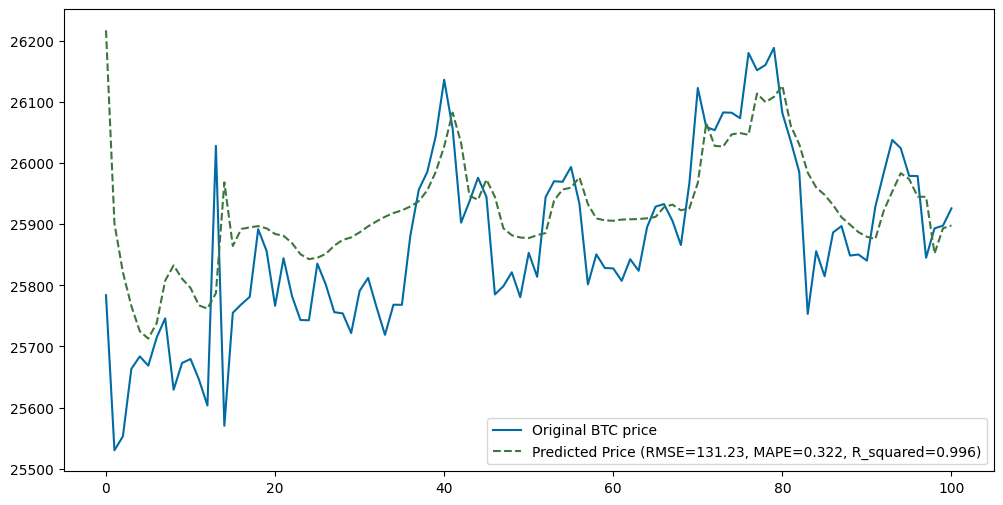

In [39]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(y_test[0:101], label = 'Original BTC price');
ax.plot(predicted_value[0:101], linestyle='--', color='#3c763d',
        label="Predicted Price (RMSE={:0.2f}, MAPE={:0.3f}, R_squared={:0.3f})".format(rmse_error, float(mdape_error), r2)); 
ax.legend();
ax.set_title("");

##### LSTM

In [40]:
with tf.device('/cpu:0'):
    # Create sequential model from tensorflow.keras
    LSTM_model1 = tf.keras.models.Sequential()
    # Add a hidden layer with input dimensions, neurons and activation function
    LSTM_model1.add(LSTM(units = 10, input_shape =(1, 1), return_sequences = False, 
                        kernel_initializer = 'he_uniform', bias_initializer = 'zeros'))
    LSTM_model1.add(Dense(1, activation = 'linear'))

    # Compile the model with optimizer and loss function
    LSTM_model1.compile(optimizer = Adam(), loss = 'mse')
    
    # Create sequential model from tensorflow.keras
    LSTM_model2 = tf.keras.models.Sequential()
    # Add a hidden layer with input dimensions, neurons and activation function
    LSTM_model2.add(LSTM(units = 10, input_shape =(1, 1), return_sequences = False, 
                        kernel_initializer = 'he_uniform', bias_initializer = 'zeros'))
    # Add output layer with one 1 ouput neuron as this is regression problem
    LSTM_model2.add(Dense(1, activation = 'linear'))

    # Compile the model with optimizer and loss function
    LSTM_model2.compile(optimizer = Adam(), loss = 'mse')
    
    
# Define early stopping and learning rate reduction criteria
callback = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 5, verbose = 1)
REDUCE_LR = callbacks.ReduceLROnPlateau(monitor = 'val_loss',
                                        patience = 2,
                                        factor = 0.5,
                                        min_lr = 1e-6,
                                        verbose = 0)

In [41]:
predicted_value, rmse_error, mdape_error, r2 = hybrid_dl(LSTM_model1, LSTM_model2, batch_size = 32,
                                                     callbacks = [callback, REDUCE_LR])

Epoch 1/500
207/207 [==============================] - 7s 7ms/step - loss: 439344768.0000 - val_loss: 783530432.0000 - lr: 0.0010
Epoch 2/500
207/207 [==============================] - 1s 6ms/step - loss: 439316448.0000 - val_loss: 783492736.0000 - lr: 0.0010
Epoch 3/500
207/207 [==============================] - 1s 6ms/step - loss: 439288448.0000 - val_loss: 783455040.0000 - lr: 0.0010
Epoch 4/500
207/207 [==============================] - 1s 6ms/step - loss: 439260448.0000 - val_loss: 783417280.0000 - lr: 0.0010
Epoch 5/500
207/207 [==============================] - 1s 6ms/step - loss: 439232448.0000 - val_loss: 783379584.0000 - lr: 0.0010
Epoch 6/500
207/207 [==============================] - 1s 6ms/step - loss: 439204544.0000 - val_loss: 783341952.0000 - lr: 0.0010
Epoch 7/500
207/207 [==============================] - 1s 6ms/step - loss: 439176672.0000 - val_loss: 783304384.0000 - lr: 0.0010
Epoch 8/500
207/207 [==============================] - 1s 6ms/step - loss: 439148896.0000 

207/207 [==============================] - 1s 6ms/step - loss: 437615872.0000 - val_loss: 781199104.0000 - lr: 0.0010
Epoch 64/500
207/207 [==============================] - 1s 6ms/step - loss: 437588096.0000 - val_loss: 781161728.0000 - lr: 0.0010
Epoch 65/500
207/207 [==============================] - 1s 6ms/step - loss: 437560032.0000 - val_loss: 781124032.0000 - lr: 0.0010
Epoch 66/500
207/207 [==============================] - 1s 6ms/step - loss: 437532352.0000 - val_loss: 781086464.0000 - lr: 0.0010
Epoch 67/500
207/207 [==============================] - 1s 6ms/step - loss: 437504288.0000 - val_loss: 781048832.0000 - lr: 0.0010
Epoch 68/500
207/207 [==============================] - 1s 6ms/step - loss: 437476384.0000 - val_loss: 781011392.0000 - lr: 0.0010
Epoch 69/500
207/207 [==============================] - 1s 6ms/step - loss: 437448736.0000 - val_loss: 780973760.0000 - lr: 0.0010
Epoch 70/500
207/207 [==============================] - 1s 6ms/step - loss: 437420768.0000 - val

KeyboardInterrupt: 

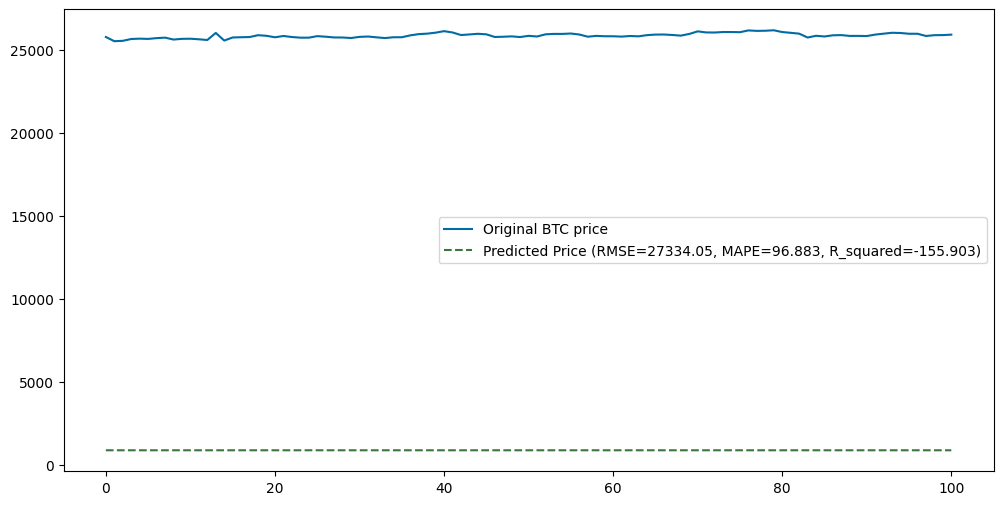

In [57]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(y_test[0:101], label = 'Original BTC price');
ax.plot(predicted_value[0:101], linestyle='--', color='#3c763d',
        label="Predicted Price (RMSE={:0.2f}, MAPE={:0.3f}, R_squared={:0.3f})".format(rmse_error, float(mdape_error), r2)); 
ax.legend();
ax.set_title("");

## Multivariate methods

In [58]:
new_df = df.copy()
new_df['trend'] = rec
new_df['resid'] = new_df['close'] - new_df['trend']

In [59]:
new_df['close'] = new_df['close'].shift(-1)
new_df = new_df.dropna()

In [60]:
trend = new_df['trend'].values
resid = new_df['resid'].values
y = new_df['close'].values

trend_X_train, trend_X_test, y_train, y_test = train_test_split(trend, y, test_size = 500, shuffle = False)
resid_X_train, resid_X_test = train_test_split(resid, test_size = 500, shuffle = False)

trend_X_train = trend_X_train.reshape(-1, 1)
trend_X_test = trend_X_test.reshape(-1, 1)
resid_X_train = resid_X_train.reshape(-1, 1)
resid_X_test = resid_X_test.reshape(-1, 1)

y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [61]:
new_df.columns

Index(['high', 'low', 'open', 'volumefrom', 'volumeto', 'close',
       'hourly_volume', 'top_tier_volume_quote', 'top_tier_volume_base',
       'top_tier_volume_total', 'cccagg_volume_quote', 'cccagg_volume_base',
       'cccagg_volume_total', 'total_volume_quote', 'total_volume_base',
       'total_volume_total', 'eth_open', 'eth_close', 'bnb_open', 'bnb_close',
       'usdt_open', 'usdt_close', 'sol_open', 'sol_close', 'hourly_return',
       '3_hourly_return', '5_hourly_return', '12_hourly_return',
       '3_hourly_volatility', '5_hourly_volatility', '12_hourly_volatility',
       'daily_volatility', 'trend_score', 'Compound_score', 'Polarity',
       'time_of_the_day', 'day', 'day_of_month', 'weekend', 'day_of_week',
       'trend', 'resid'],
      dtype='object')

##### With base features

In [62]:
#trend = new_df.drop(['seasonal', 'resid', 'close'], axis = 1)
trend = new_df[['high', 'low', 'open', 'volumefrom', 'volumeto', 'hourly_volume', 'hourly_return', 'trend']]
resid = new_df[['resid']]
y = new_df[['close']]

trend_X_train, trend_X_test, y_train, y_test = train_test_split(trend, y, test_size = 500, shuffle = False)
resid_X_train, resid_X_test = train_test_split(resid, test_size = 500, shuffle = False)

In [63]:
trend_X_train.shape, trend_X_test.shape, y_train.shape, y_test.shape, resid_X_train.shape, resid_X_test.shape

((8259, 8), (500, 8), (8259, 1), (500, 1), (8259, 1), (500, 1))

In [64]:
# trend_X_train = trend_X_train.reshape(-1, 1)
# trend_X_test = trend_X_test.reshape(-1, 1)
# resid_X_train = resid_X_train.reshape(-1, 1)
# resid_X_test = resid_X_test.reshape(-1, 1)
# seasonal_X_train = seasonal_X_train.reshape(-1, 1)
# seasonal_X_test = seasonal_X_test.reshape(-1, 1)

# y_train = y_train.reshape(-1, 1)
# y_test = y_test.reshape(-1, 1)

In [65]:
# trend_X_train.shape, trend_X_test.shape, y_train.shape, y_test.shape, resid_X_train.shape, resid_X_test.shape, seasonal_X_train.shape, seasonal_X_test.shape

In [66]:
# Functions for transformation
y_train_original = y_train.copy()
y_test_original = y_test.copy()

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

cols1 = trend_X_train.columns
trend_enc = RobustScaler()
trend_X_train[cols1] = trend_enc.fit_transform(trend_X_train[cols1])
trend_X_test[cols1] = trend_enc.transform(trend_X_test[cols1])

cols2 = y_train.columns
y_enc = RobustScaler()
y_train[cols2] = y_enc.fit_transform(y_train[cols2])
y_test[cols2] = y_enc.transform(y_test[cols2])

In [67]:
# Fit trend model
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=False)
model.fit(trend_X_train, y_train)

LinearRegression(fit_intercept=False)

In [68]:
y_fit = model.predict(trend_X_train)
y_pred = model.predict(trend_X_test)

In [69]:
y_pred.shape

(500, 1)

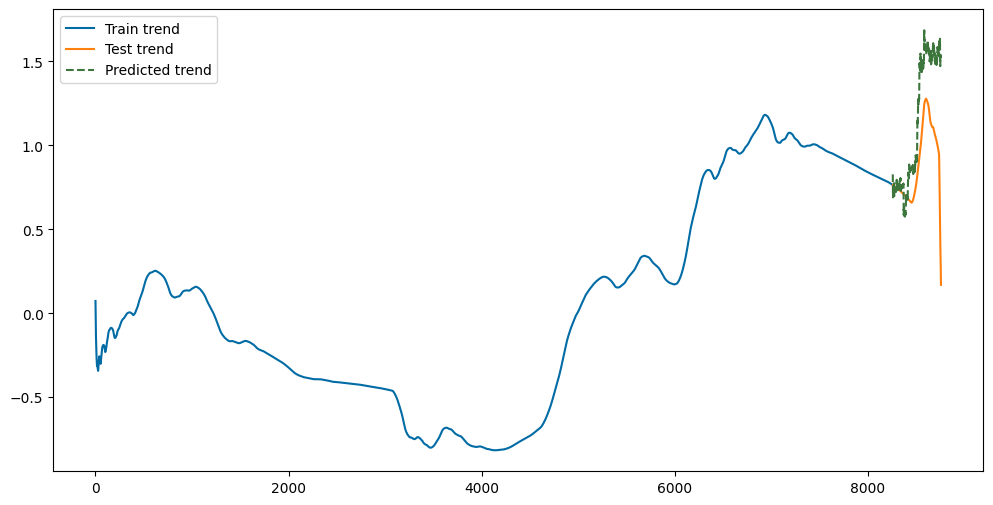

In [70]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(np.arange(0, len(new_df.index) - 500), trend_X_train['trend'][:len(new_df.index) - 500], label = 'Train trend');
ax.plot(np.arange(len(new_df.index) - 500, len(new_df.index)), trend_X_test['trend'], label = 'Test trend');
#ax.plot(np.arange(0, len(df.index) - 500), y_fit, linestyle='--', color='#ff7823');
ax.plot(np.arange(len(new_df.index) - 500, len(new_df.index)), y_pred, linestyle='--', color='#3c763d', label = 'Predicted trend'); 
ax.legend();
ax.set_title("");

In [71]:
rmse(trend_X_test['trend'], y_pred)

0.35893468069042517

In [72]:
y_pred = y_enc.inverse_transform(y_pred)
y_fit = y_enc.inverse_transform(y_fit)

In [73]:
# Create residuals (the collection of detrended series) from the training set
y_resid = y_train_original - y_fit

In [74]:
# Train XGBoost on the residuals
xgb = LinearRegression()
xgb.fit(resid_X_train, y_resid)

LinearRegression()

In [75]:
# Add the predicted residuals onto the predicted trends
y_pred_boosted = xgb.predict(resid_X_test).reshape(-1, 1) + y_pred

In [76]:
rmse(y_test_original, y_pred_boosted)

133.27550574205662

In [77]:
MAPE(y_test_original.values, y_pred_boosted)

0.29414600103754945

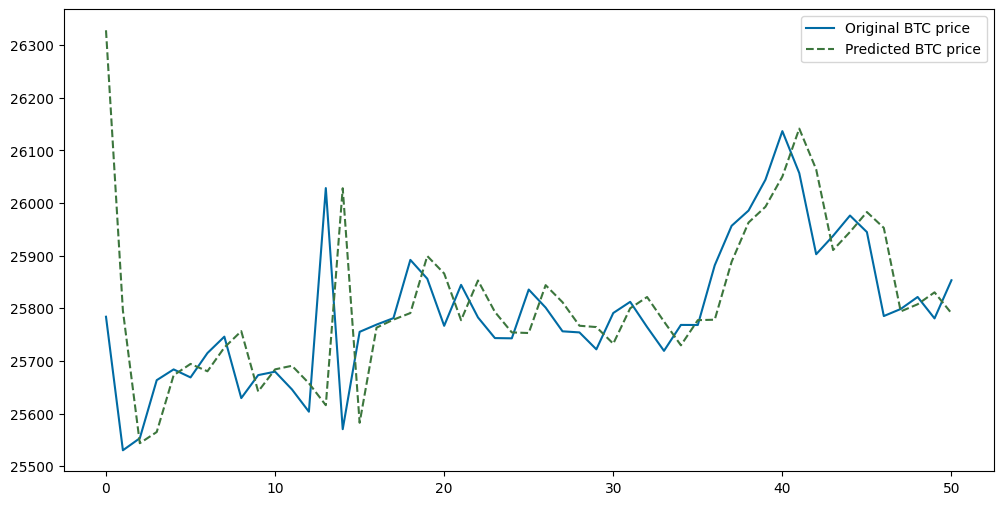

In [78]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(y_test_original.values[0:51], label = 'Original BTC price');
ax.plot(y_pred_boosted[0:51], linestyle='--', color='#3c763d', label = 'Predicted BTC price'); 
ax.legend();
ax.set_title("");

##### Search for model combination

In [82]:
def hybrid(model1, model2):
    model1.fit(trend_X_train, y_train)
    y_fit = model1.predict(trend_X_train)
    y_pred = model1.predict(trend_X_test)
    
    y_pred = y_enc.inverse_transform(y_pred.reshape(-1,1))
    y_fit = y_enc.inverse_transform(y_fit.reshape(-1,1))

    y_resid = y_train_original - y_fit

    model2.fit(resid_X_train, y_resid)
    y_pred_boosted = model2.predict(resid_X_test).reshape(-1, 1) + y_pred.reshape(-1, 1)
    
    return y_pred_boosted, rmse(y_test_original, y_pred_boosted), float(MAPE(y_test_original.values, y_pred_boosted)), r2_score(y_test_original, y_pred_boosted)

In [83]:
# list of all models
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

regressor1 = LinearRegression()
regressor2 = Ridge()
svr = SVR()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()
gb = GradientBoostingRegressor()
xgb = XGBRegressor()
voting = VotingRegressor([('LR', regressor1), ('Ridge', regressor2), ('svr', svr), ('KNN', knn), ('dt', dt), ('rf', rf),
                          ('gb', gb), ('xgb', xgb)])

In [85]:
model_list = [regressor1, regressor2, svr, knn, dt, rf, gb, xgb, voting]
error_list = []
combination = []

for i in model_list:
    for j in model_list:
        print('Iteration started: ', str(len(error_list) + 1))
        #print('Training started with: ', i, ', ', j)
        point1, rmse_error, mdape_error, r2 = hybrid(i, j)
        error_list.append(rmse_error)
        combination.append([i, j])
        
ind = error_list.index(min(error_list))
best_combo = combination[ind]
print("==========Hybrid Model Combination search result==========")
print("Best error: ", str(error_list[ind]), ', with combination: ', best_combo)

Iteration started:  1
Iteration started:  2
Iteration started:  3
Iteration started:  4
Iteration started:  5
Iteration started:  6
Iteration started:  7
Iteration started:  8
Iteration started:  9
Iteration started:  10
Iteration started:  11
Iteration started:  12
Iteration started:  13
Iteration started:  14
Iteration started:  15
Iteration started:  16
Iteration started:  17
Iteration started:  18
Iteration started:  19
Iteration started:  20
Iteration started:  21
Iteration started:  22
Iteration started:  23
Iteration started:  24
Iteration started:  25
Iteration started:  26
Iteration started:  27
Iteration started:  28
Iteration started:  29
Iteration started:  30
Iteration started:  31
Iteration started:  32
Iteration started:  33
Iteration started:  34
Iteration started:  35
Iteration started:  36
Iteration started:  37
Iteration started:  38
Iteration started:  39
Iteration started:  40
Iteration started:  41
Iteration started:  42
Iteration started:  43
Iteration started:  

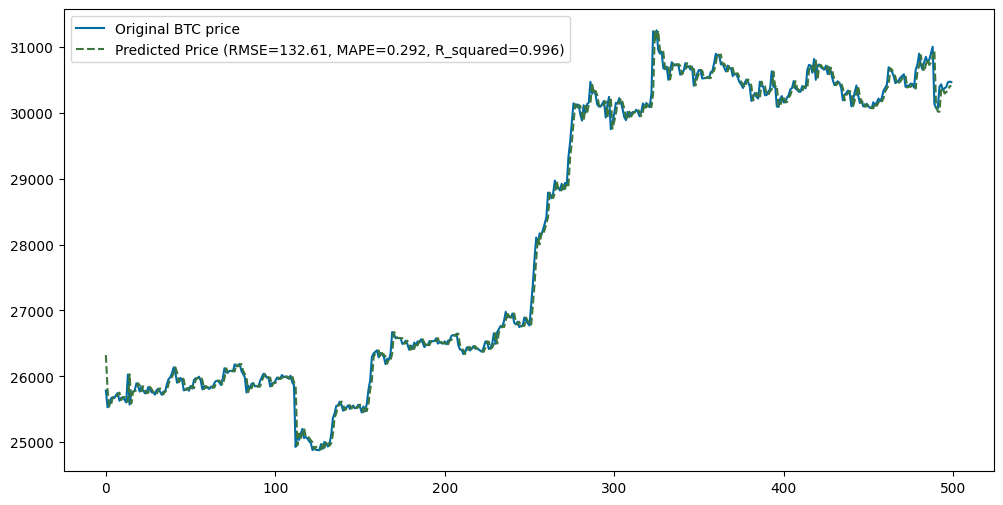

In [86]:
predicted_value, rmse_error, mdape_error, r2 = hybrid(LinearRegression(), SVR())

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(y_test_original.values, label = 'Original BTC price');
ax.plot(predicted_value, linestyle='--', color='#3c763d',
        label="Predicted Price (RMSE={:0.2f}, MAPE={:0.3f}, R_squared={:0.3f})".format(rmse_error, mdape_error, r2)); 
ax.legend();
ax.set_title("");

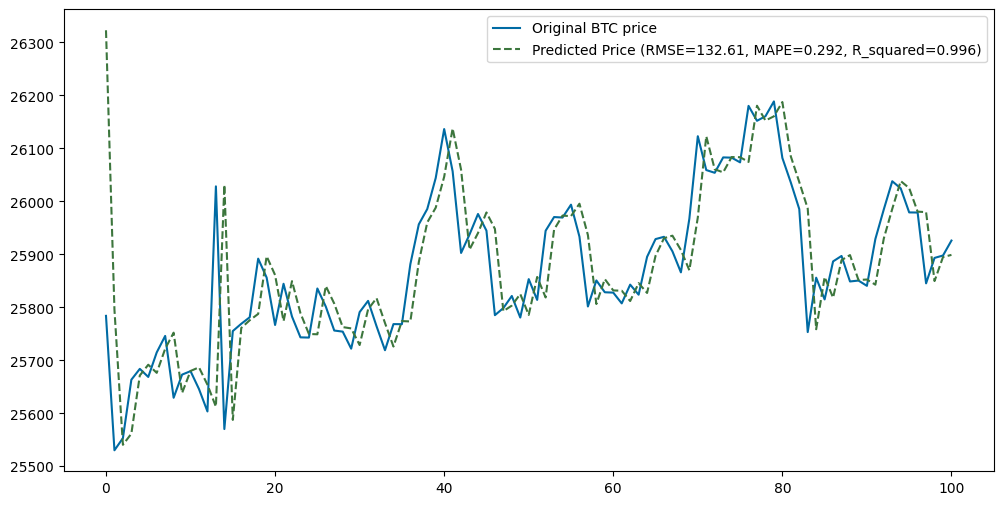

In [87]:
predicted_value, rmse_error, mdape_error, r2 = hybrid(LinearRegression(), SVR())

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(y_test_original.values[0:101], label = 'Original BTC price');
ax.plot(predicted_value[0:101], linestyle='--', color='#3c763d',
        label="Predicted Price (RMSE={:0.2f}, MAPE={:0.3f}, R_squared={:0.3f})".format(rmse_error, mdape_error, r2)); 
ax.legend();
ax.set_title("");

### Deep learning

##### ANN

In [91]:
def hybrid_dl(model1, model2, batch_size = 16, callbacks = [callback, REDUCE_LR]):
    history = model1.fit(trend_X_train, y_train, epochs = 200, batch_size = batch_size, validation_split = 0.2, shuffle = False,
                        callbacks = callbacks)
    y_fit = model1.predict(trend_X_train)
    y_pred = model1.predict(trend_X_test)
    
    y_pred = y_enc.inverse_transform(y_pred)
    y_fit = y_enc.inverse_transform(y_fit)

    y_resid = y_train_original - y_fit

    history = model2.fit(resid_X_train, y_resid, epochs = 200, batch_size = batch_size, validation_split = 0.2, shuffle = False,
                        callbacks = callbacks)
    y_pred_boosted = model2.predict(resid_X_test).reshape(-1, 1) + y_pred.reshape(-1, 1) + seasonal_X_test
    
    return y_pred_boosted, rmse(y_test_original, y_pred_boosted), float(MAPE(y_test_original.values, y_pred_boosted.values)), r2_score(y_test_original, y_pred_boosted)

In [92]:
def create_ann(units = 24, input_dim = 8, optimizer = RMSprop(learning_rate = 0.0001)):
    with tf.device('/cpu:0'):
        # Create sequential model from tensorflow.keras
        ANN_model = tf.keras.models.Sequential()
        # Add a hidden layer with input dimensions, neurons and activation function
        ANN_model.add(Dense(units = units, input_dim = input_dim, activation = 'relu',
                             activity_regularizer = tf.keras.regularizers.L2(l2 = 0)))

        # Add output layer with one 1 ouput neuron as this is regression problem
        ANN_model.add(Dense(1, activation = 'linear'))

        # Compile the model with optimizer and loss function
        ANN_model.compile(optimizer = optimizer, loss = 'mse')
        
    return ANN_model

In [93]:
ANN_model1 = create_ann(units = 24, input_dim = 8, optimizer = RMSprop(learning_rate = 0.0001))
ANN_model2 = create_ann(units = 10, input_dim = 1, optimizer = RMSprop(learning_rate = 0.0001))

# Define early stopping and learning rate reduction criteria
callback = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 5, verbose = 1)
REDUCE_LR = callbacks.ReduceLROnPlateau(monitor = 'val_loss',
                                        patience = 2,
                                        factor = 0.5,
                                        min_lr = 1e-6,
                                        verbose = 0)

In [94]:
predicted_value, rmse_error, mdape_error, r2 = hybrid_dl(ANN_model1, ANN_model2, batch_size = 32,
                                                         callbacks = [callback, REDUCE_LR])

Epoch 1/200
207/207 [==============================] - 1s 4ms/step - loss: 0.4838 - val_loss: 1.8776 - lr: 1.0000e-04
Epoch 2/200
207/207 [==============================] - 1s 4ms/step - loss: 0.3383 - val_loss: 1.3561 - lr: 1.0000e-04
Epoch 3/200
207/207 [==============================] - 1s 4ms/step - loss: 0.2285 - val_loss: 0.9255 - lr: 1.0000e-04
Epoch 4/200
207/207 [==============================] - 1s 4ms/step - loss: 0.1468 - val_loss: 0.5774 - lr: 1.0000e-04
Epoch 5/200
207/207 [==============================] - 1s 4ms/step - loss: 0.0885 - val_loss: 0.3110 - lr: 1.0000e-04
Epoch 6/200
207/207 [==============================] - 1s 4ms/step - loss: 0.0500 - val_loss: 0.1364 - lr: 1.0000e-04
Epoch 7/200
207/207 [==============================] - 1s 4ms/step - loss: 0.0283 - val_loss: 0.0506 - lr: 1.0000e-04
Epoch 8/200
207/207 [==============================] - 1s 4ms/step - loss: 0.0181 - val_loss: 0.0228 - lr: 1.0000e-04
Epoch 9/200
207/207 [==============================] - 1

Epoch 50/200
207/207 [==============================] - 1s 4ms/step - loss: 207677.5156 - val_loss: 533274.7500 - lr: 1.0000e-04
Epoch 51/200
207/207 [==============================] - 1s 4ms/step - loss: 207665.0938 - val_loss: 532838.8125 - lr: 1.0000e-04
Epoch 52/200
207/207 [==============================] - 1s 4ms/step - loss: 207654.7500 - val_loss: 532427.3750 - lr: 1.0000e-04
Epoch 53/200
207/207 [==============================] - 1s 4ms/step - loss: 207646.2188 - val_loss: 532038.8125 - lr: 1.0000e-04
Epoch 54/200
207/207 [==============================] - 1s 4ms/step - loss: 207639.1562 - val_loss: 531672.3125 - lr: 1.0000e-04
Epoch 55/200
207/207 [==============================] - 1s 4ms/step - loss: 207633.5469 - val_loss: 531326.4375 - lr: 1.0000e-04
Epoch 56/200
207/207 [==============================] - 1s 4ms/step - loss: 207629.0938 - val_loss: 531000.1875 - lr: 1.0000e-04
Epoch 57/200
207/207 [==============================] - 1s 4ms/step - loss: 207625.6406 - val_los

207/207 [==============================] - 1s 4ms/step - loss: 207677.8750 - val_loss: 525696.7500 - lr: 1.0000e-04
Epoch 177/200
207/207 [==============================] - 1s 4ms/step - loss: 207677.8906 - val_loss: 525696.1250 - lr: 1.0000e-04
Epoch 178/200
207/207 [==============================] - 1s 4ms/step - loss: 207677.9219 - val_loss: 525695.6250 - lr: 1.0000e-04
Epoch 179/200
207/207 [==============================] - 1s 4ms/step - loss: 207677.9531 - val_loss: 525695.0625 - lr: 1.0000e-04
Epoch 180/200
207/207 [==============================] - 1s 4ms/step - loss: 207677.8438 - val_loss: 525694.5625 - lr: 1.0000e-04
Epoch 181/200
207/207 [==============================] - 1s 4ms/step - loss: 207677.8906 - val_loss: 525694.1250 - lr: 1.0000e-04
Epoch 182/200
207/207 [==============================] - 1s 4ms/step - loss: 207677.8750 - val_loss: 525693.5000 - lr: 1.0000e-04
Epoch 183/200
207/207 [==============================] - 1s 3ms/step - loss: 207677.7969 - val_loss: 525

NameError: name 'seasonal_X_test' is not defined

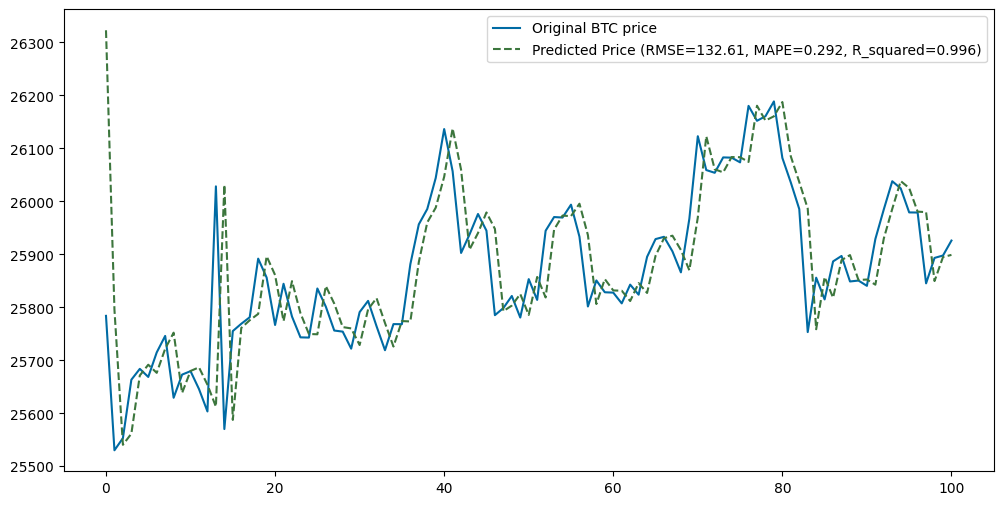

In [96]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(y_test_original.values[0:101], label = 'Original BTC price');
ax.plot(predicted_value[0:101], linestyle='--', color='#3c763d',
        label="Predicted Price (RMSE={:0.2f}, MAPE={:0.3f}, R_squared={:0.3f})".format(rmse_error, mdape_error, r2)); 
ax.legend();
ax.set_title("");

##### LSTM

In [97]:
def create_lstm(units = 24, input_shape = (8, 1), optimizer = Adam()):
    with tf.device('/cpu:0'):
        # Create sequential model from tensorflow.keras
        LSTM_model = tf.keras.models.Sequential()
        # Add a hidden layer with input dimensions, neurons and activation function
        LSTM_model.add(LSTM(units = units, input_shape = input_shape, return_sequences = False, 
                            kernel_initializer = 'he_uniform', bias_initializer = 'zeros'))
        LSTM_model.add(Dense(1, activation = 'linear'))

        # Compile the model with optimizer and loss function
        LSTM_model.compile(optimizer = optimizer, loss = 'mse')
    return LSTM_model

In [98]:
LSTM_model1 = create_lstm(units = 24, input_shape = (8, 1), optimizer = Adam())
LSTM_model2 = create_lstm(units = 10, input_shape = (1, 1), optimizer = Adam())

# Define early stopping and learning rate reduction criteria
callback = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 5, verbose = 1)
REDUCE_LR = callbacks.ReduceLROnPlateau(monitor = 'val_loss',
                                        patience = 2,
                                        factor = 0.5,
                                        min_lr = 1e-6,
                                        verbose = 0)

In [99]:
predicted_value, rmse_error, mdape_error, r2 = hybrid_dl(LSTM_model1, LSTM_model2, batch_size = 32,
                                                     callbacks = [callback, REDUCE_LR])

Epoch 1/200
207/207 [==============================] - 3s 7ms/step - loss: 0.1417 - val_loss: 0.2102 - lr: 0.0010
Epoch 2/200
207/207 [==============================] - 1s 6ms/step - loss: 0.0936 - val_loss: 0.1586 - lr: 0.0010
Epoch 3/200
207/207 [==============================] - 1s 6ms/step - loss: 0.0543 - val_loss: 0.0951 - lr: 0.0010
Epoch 4/200
207/207 [==============================] - 1s 6ms/step - loss: 0.0367 - val_loss: 0.0623 - lr: 0.0010
Epoch 5/200
207/207 [==============================] - 1s 6ms/step - loss: 0.0269 - val_loss: 0.0476 - lr: 0.0010
Epoch 6/200
207/207 [==============================] - 1s 6ms/step - loss: 0.0207 - val_loss: 0.0416 - lr: 0.0010
Epoch 7/200
207/207 [==============================] - 1s 6ms/step - loss: 0.0165 - val_loss: 0.0388 - lr: 0.0010
Epoch 8/200
207/207 [==============================] - 1s 6ms/step - loss: 0.0136 - val_loss: 0.0365 - lr: 0.0010
Epoch 9/200
207/207 [==============================] - 1s 6ms/step - loss: 0.0115 - val_

Epoch 71/200
207/207 [==============================] - 1s 6ms/step - loss: 9.7416e-04 - val_loss: 0.0058 - lr: 6.2500e-05
Epoch 72/200
207/207 [==============================] - 1s 6ms/step - loss: 9.8632e-04 - val_loss: 0.0059 - lr: 3.1250e-05
Epoch 72: early stopping
16/16 [==============================] - 0s 2ms/step
Epoch 1/200
207/207 [==============================] - 2s 7ms/step - loss: 33683.7188 - val_loss: 194587.0469 - lr: 0.0010
Epoch 2/200
207/207 [==============================] - 1s 5ms/step - loss: 33660.0586 - val_loss: 194477.8438 - lr: 0.0010
Epoch 3/200
207/207 [==============================] - 1s 5ms/step - loss: 33635.5977 - val_loss: 194367.8281 - lr: 0.0010
Epoch 4/200
207/207 [==============================] - 1s 5ms/step - loss: 33611.0781 - val_loss: 194257.6875 - lr: 0.0010
Epoch 5/200
207/207 [==============================] - 1s 5ms/step - loss: 33587.6992 - val_loss: 194148.6250 - lr: 0.0010
Epoch 6/200
207/207 [==============================] - 1s 5ms

207/207 [==============================] - 1s 5ms/step - loss: 32324.4297 - val_loss: 188052.6562 - lr: 0.0010
Epoch 65/200
207/207 [==============================] - 1s 5ms/step - loss: 32311.2520 - val_loss: 187972.3438 - lr: 0.0010
Epoch 66/200
207/207 [==============================] - 1s 5ms/step - loss: 32289.0098 - val_loss: 187868.2031 - lr: 0.0010
Epoch 67/200
207/207 [==============================] - 1s 5ms/step - loss: 32269.5234 - val_loss: 187760.5781 - lr: 0.0010
Epoch 68/200
207/207 [==============================] - 1s 5ms/step - loss: 32264.3652 - val_loss: 187679.8281 - lr: 0.0010
Epoch 69/200
207/207 [==============================] - 1s 5ms/step - loss: 32232.9141 - val_loss: 187577.8281 - lr: 0.0010
Epoch 70/200
207/207 [==============================] - 1s 5ms/step - loss: 32214.7539 - val_loss: 187477.9062 - lr: 0.0010
Epoch 71/200
207/207 [==============================] - 1s 5ms/step - loss: 32195.3633 - val_loss: 187374.1250 - lr: 0.0010
Epoch 72/200
207/207 

Epoch 130/200
207/207 [==============================] - 1s 5ms/step - loss: 31241.0312 - val_loss: 182037.9062 - lr: 0.0010
Epoch 131/200
207/207 [==============================] - 1s 5ms/step - loss: 31230.7773 - val_loss: 181984.6406 - lr: 0.0010
Epoch 132/200
207/207 [==============================] - 1s 5ms/step - loss: 31215.0391 - val_loss: 181882.2500 - lr: 0.0010
Epoch 133/200
207/207 [==============================] - 1s 5ms/step - loss: 31200.9902 - val_loss: 181759.0156 - lr: 0.0010
Epoch 134/200
207/207 [==============================] - 1s 5ms/step - loss: 31180.4043 - val_loss: 181512.8750 - lr: 0.0010
Epoch 135/200
207/207 [==============================] - 1s 5ms/step - loss: 31186.4238 - val_loss: 181622.7031 - lr: 0.0010
Epoch 136/200
207/207 [==============================] - 1s 5ms/step - loss: 31162.6680 - val_loss: 181531.3438 - lr: 0.0010
Epoch 137/200
207/207 [==============================] - 1s 5ms/step - loss: 31131.2168 - val_loss: 181443.3125 - lr: 5.0000e

Epoch 194/200
207/207 [==============================] - 1s 5ms/step - loss: 30868.3125 - val_loss: 179778.8125 - lr: 2.5000e-04
Epoch 195/200
207/207 [==============================] - 1s 5ms/step - loss: 30864.9883 - val_loss: 179757.5781 - lr: 2.5000e-04
Epoch 196/200
207/207 [==============================] - 1s 5ms/step - loss: 30861.6348 - val_loss: 179736.4219 - lr: 2.5000e-04
Epoch 197/200
207/207 [==============================] - 1s 5ms/step - loss: 30858.2988 - val_loss: 179715.2812 - lr: 2.5000e-04
Epoch 198/200
207/207 [==============================] - 1s 5ms/step - loss: 30854.9531 - val_loss: 179694.1562 - lr: 2.5000e-04
Epoch 199/200
207/207 [==============================] - 1s 5ms/step - loss: 30851.6230 - val_loss: 179673.0781 - lr: 2.5000e-04
Epoch 200/200
16/16 [==============================] - 0s 2ms/step


NameError: name 'seasonal_X_test' is not defined

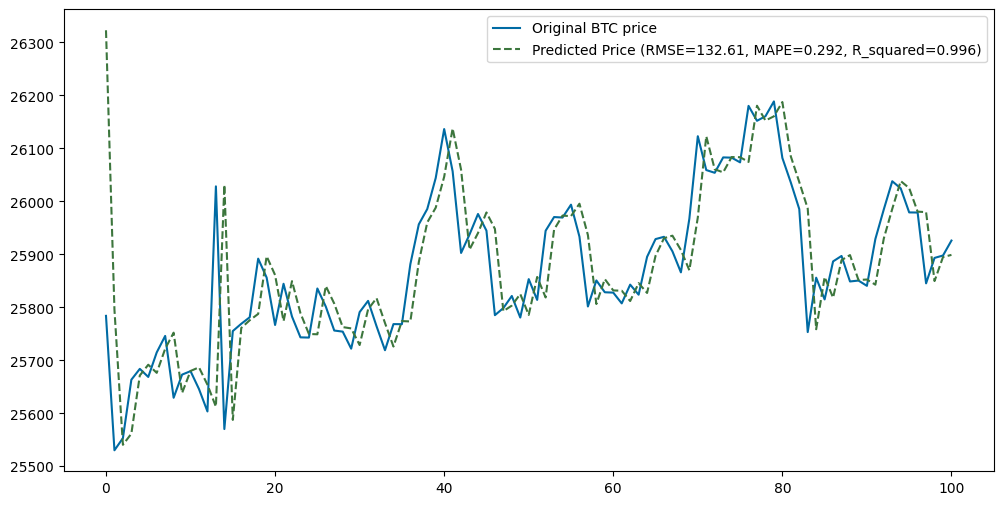

In [100]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(y_test_original.values[0:101], label = 'Original BTC price');
ax.plot(predicted_value[0:101], linestyle='--', color='#3c763d',
        label="Predicted Price (RMSE={:0.2f}, MAPE={:0.3f}, R_squared={:0.3f})".format(rmse_error, mdape_error, r2)); 
ax.legend();
ax.set_title("");

##### CNN-LSTM

In [101]:
trend_X_train.shape

(8259, 8)

In [102]:
trend_X_train = trend_X_train.values.reshape(trend_X_train.shape[0], 1, trend_X_train.shape[1], 1)
trend_X_test = trend_X_test.values.reshape(trend_X_test.shape[0], 1, trend_X_test.shape[1],  1)

In [103]:
# resid_X_train = resid_X_train.values.reshape(resid_X_train.shape[0], 1, resid_X_train.shape[1], 1)
# resid_X_test = resid_X_test.values.reshape(resid_X_test.shape[0], 1, resid_X_test.shape[1], 1)
# seasonal_X_train = seasonal_X_train.reshape(-1, 1)
# seasonal_X_test = seasonal_X_test.reshape(-1, 1)

# y_train = y_train.reshape(-1, 1)
# y_test = y_test.reshape(-1, 1)

In [104]:
def create_cnn_lstm(filters = 32, kernel_size = 1, input_shape=(None, 19, 1), lstm_units = 19,
                    optimizer = SGD(learning_rate = 0.1), pooling = True):
    with tf.device('/cpu:0'):
        # Create sequential model from tensorflow.keras
        CNN_LSTM_model = tf.keras.models.Sequential()

        CNN_LSTM_model.add(TimeDistributed(Conv1D(filters = filters, kernel_size = kernel_size, activation='relu'),
                                           input_shape = input_shape))
        if pooling == True:
            CNN_LSTM_model.add(TimeDistributed(MaxPooling1D(pool_size = 2)))
        CNN_LSTM_model.add(TimeDistributed(Flatten()))
        # Add a hidden layer with input dimensions, neurons and activation function

        CNN_LSTM_model.add(LSTM(units = lstm_units, kernel_initializer = 'he_uniform', bias_initializer = 'zeros',
                            activity_regularizer = tf.keras.regularizers.L2(l2 = 0)))
        CNN_LSTM_model.add(Dropout(rate = 0))
        # Add output layer with one 1 ouput neuron as this is regression problem
        CNN_LSTM_model.add(Dense(1, activation = 'linear'))
        CNN_LSTM_model.summary()

        # Compile the model with optimizer and loss function
        CNN_LSTM_model.compile(optimizer = optimizer, loss = 'mse')
    return CNN_LSTM_model

In [105]:
cnn_lstm1 = create_cnn_lstm(filters = 64, kernel_size = 3, input_shape = (None, 8, 1), lstm_units = 8,
                            optimizer = Adam(), pooling = True)

ANN_model = create_ann(units = 4, input_dim = 1, optimizer = Adam(learning_rate = 0.0001))
    
# Define early stopping and learning rate reduction criteria
callback = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 5, verbose = 1)
REDUCE_LR = callbacks.ReduceLROnPlateau(monitor = 'val_loss',
                                        patience = 2,
                                        factor = 0.5,
                                        min_lr = 1e-6,
                                        verbose = 0)

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDistr  (None, None, 6, 64)      256       
 ibuted)                                                         
                                                                 
 time_distributed_1 (TimeDis  (None, None, 3, 64)      0         
 tributed)                                                       
                                                                 
 time_distributed_2 (TimeDis  (None, None, 192)        0         
 tributed)                                                       
                                                                 
 lstm_6 (LSTM)               (None, 8)                 6432      
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                     

In [106]:
predicted_value, rmse_error, mdape_error, r2 = hybrid_dl(cnn_lstm1, ANN_model, batch_size = 32,
                                                     callbacks = [callback, REDUCE_LR])

Epoch 1/200
207/207 [==============================] - 10s 11ms/step - loss: 0.0805 - val_loss: 0.0944 - lr: 0.0010
Epoch 2/200
207/207 [==============================] - 1s 6ms/step - loss: 0.0253 - val_loss: 0.0345 - lr: 0.0010
Epoch 3/200
207/207 [==============================] - 1s 6ms/step - loss: 0.0082 - val_loss: 0.0197 - lr: 0.0010
Epoch 4/200
207/207 [==============================] - 1s 6ms/step - loss: 0.0053 - val_loss: 0.0143 - lr: 0.0010
Epoch 5/200
207/207 [==============================] - 1s 6ms/step - loss: 0.0041 - val_loss: 0.0111 - lr: 0.0010
Epoch 6/200
207/207 [==============================] - 1s 6ms/step - loss: 0.0035 - val_loss: 0.0083 - lr: 0.0010
Epoch 7/200
207/207 [==============================] - 1s 6ms/step - loss: 0.0030 - val_loss: 0.0066 - lr: 0.0010
Epoch 8/200
207/207 [==============================] - 1s 6ms/step - loss: 0.0028 - val_loss: 0.0053 - lr: 0.0010
Epoch 9/200
207/207 [==============================] - 1s 6ms/step - loss: 0.0027 - va

Epoch 93/200
207/207 [==============================] - 1s 4ms/step - loss: 45579.3945 - val_loss: 74342.5703 - lr: 1.0000e-04
Epoch 94/200
207/207 [==============================] - 1s 4ms/step - loss: 44052.1523 - val_loss: 73525.4062 - lr: 1.0000e-04
Epoch 95/200
207/207 [==============================] - 1s 4ms/step - loss: 42603.8086 - val_loss: 72747.8906 - lr: 1.0000e-04
Epoch 96/200
207/207 [==============================] - 1s 4ms/step - loss: 41231.1562 - val_loss: 72008.7188 - lr: 1.0000e-04
Epoch 97/200
207/207 [==============================] - 1s 4ms/step - loss: 39931.0781 - val_loss: 71306.5391 - lr: 1.0000e-04
Epoch 98/200
207/207 [==============================] - 1s 4ms/step - loss: 38700.5234 - val_loss: 70639.9688 - lr: 1.0000e-04
Epoch 99/200
207/207 [==============================] - 1s 4ms/step - loss: 37536.5391 - val_loss: 70007.7188 - lr: 1.0000e-04
Epoch 100/200
207/207 [==============================] - 1s 4ms/step - loss: 36436.2773 - val_loss: 69408.4375 

207/207 [==============================] - 1s 4ms/step - loss: 20509.0059 - val_loss: 60240.1680 - lr: 1.0000e-04
Epoch 158/200
207/207 [==============================] - 1s 4ms/step - loss: 20494.0605 - val_loss: 60227.7344 - lr: 1.0000e-04
Epoch 159/200
207/207 [==============================] - 1s 4ms/step - loss: 20480.2285 - val_loss: 60216.1016 - lr: 1.0000e-04
Epoch 160/200
207/207 [==============================] - 1s 4ms/step - loss: 20467.4355 - val_loss: 60205.1953 - lr: 1.0000e-04
Epoch 161/200
207/207 [==============================] - 1s 4ms/step - loss: 20455.5918 - val_loss: 60194.9844 - lr: 1.0000e-04
Epoch 162/200
207/207 [==============================] - 1s 4ms/step - loss: 20444.6309 - val_loss: 60185.4141 - lr: 1.0000e-04
Epoch 163/200
207/207 [==============================] - 1s 4ms/step - loss: 20434.4824 - val_loss: 60176.4453 - lr: 1.0000e-04
Epoch 164/200
207/207 [==============================] - 1s 4ms/step - loss: 20425.0840 - val_loss: 60168.0547 - lr: 1

NameError: name 'seasonal_X_test' is not defined

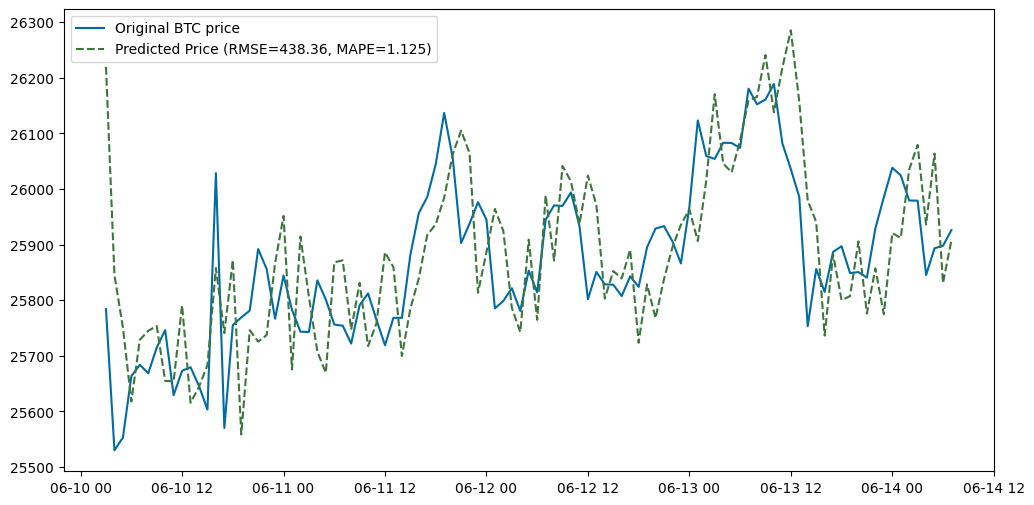

In [313]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(y_test_original[0:101], label = 'Original BTC price');
ax.plot(predicted_value[0:101], linestyle='--', color='#3c763d',
        label="Predicted Price (RMSE={:0.2f}, MAPE={:0.3f})".format(rmse_error, mdape_error)); 
ax.legend();
ax.set_title("");

##### ML-DL hybrid

In [314]:
def hybrid_dl_ml(model1, model2, batch_size = 16, callbacks = [callback, REDUCE_LR]):
    history = model1.fit(trend_X_train, y_train, epochs = 500, batch_size = batch_size, validation_split = 0.2, shuffle = False,
                        callbacks = callbacks)
    y_fit = model1.predict(trend_X_train)
    y_pred = model1.predict(trend_X_test)
    
    y_pred = y_enc.inverse_transform(y_pred)
    y_fit = y_enc.inverse_transform(y_fit)

    y_resid = y_train_original - y_fit

    model2.fit(resid_X_train, y_resid)
    y_pred_boosted = model2.predict(resid_X_test).reshape(-1, 1) + y_pred.reshape(-1, 1) + seasonal_X_test
    
    return y_pred_boosted, rmse(y_test_original, y_pred_boosted), float(MAPE(y_test_original.values, y_pred_boosted.values))

In [315]:
regressor1 = LinearRegression()
regressor2 = Ridge()
svr = SVR()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()
gb = GradientBoostingRegressor()
xgb = XGBRegressor()
voting = VotingRegressor([('LR', regressor1), ('Ridge', regressor2), ('svr', svr), ('KNN', knn), ('dt', dt), ('rf', rf),
                          ('gb', gb), ('xgb', xgb)])

In [339]:
cnn_lstm = create_cnn_lstm(filters = 64, kernel_size = 4, input_shape = (None, 8, 1), lstm_units = 8,
                            optimizer = Adam(learning_rate = 0.0001), pooling = True)

Model: "sequential_103"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_117 (TimeD  (None, None, 5, 64)      320       
 istributed)                                                     
                                                                 
 time_distributed_118 (TimeD  (None, None, 2, 64)      0         
 istributed)                                                     
                                                                 
 time_distributed_119 (TimeD  (None, None, 128)        0         
 istributed)                                                     
                                                                 
 lstm_52 (LSTM)              (None, 8)                 4384      
                                                                 
 dropout_40 (Dropout)        (None, 8)                 0         
                                                    

In [340]:
predicted_value, rmse_error, mdape_error = hybrid_dl_ml(cnn_lstm, regressor2, batch_size = 32,
                                                     callbacks = [callback, REDUCE_LR])

Epoch 1/500
207/207 [==============================] - 3s 10ms/step - loss: 0.2754 - val_loss: 1.4343 - lr: 1.0000e-04
Epoch 2/500
207/207 [==============================] - 2s 9ms/step - loss: 0.2192 - val_loss: 1.2864 - lr: 1.0000e-04
Epoch 3/500
207/207 [==============================] - 2s 9ms/step - loss: 0.1632 - val_loss: 1.0976 - lr: 1.0000e-04
Epoch 4/500
207/207 [==============================] - 2s 9ms/step - loss: 0.1049 - val_loss: 0.8448 - lr: 1.0000e-04
Epoch 5/500
207/207 [==============================] - 2s 9ms/step - loss: 0.0581 - val_loss: 0.5637 - lr: 1.0000e-04
Epoch 6/500
207/207 [==============================] - 2s 9ms/step - loss: 0.0310 - val_loss: 0.3324 - lr: 1.0000e-04
Epoch 7/500
207/207 [==============================] - 2s 9ms/step - loss: 0.0178 - val_loss: 0.1849 - lr: 1.0000e-04
Epoch 8/500
207/207 [==============================] - 2s 9ms/step - loss: 0.0114 - val_loss: 0.1032 - lr: 1.0000e-04
Epoch 9/500
207/207 [==============================] - 

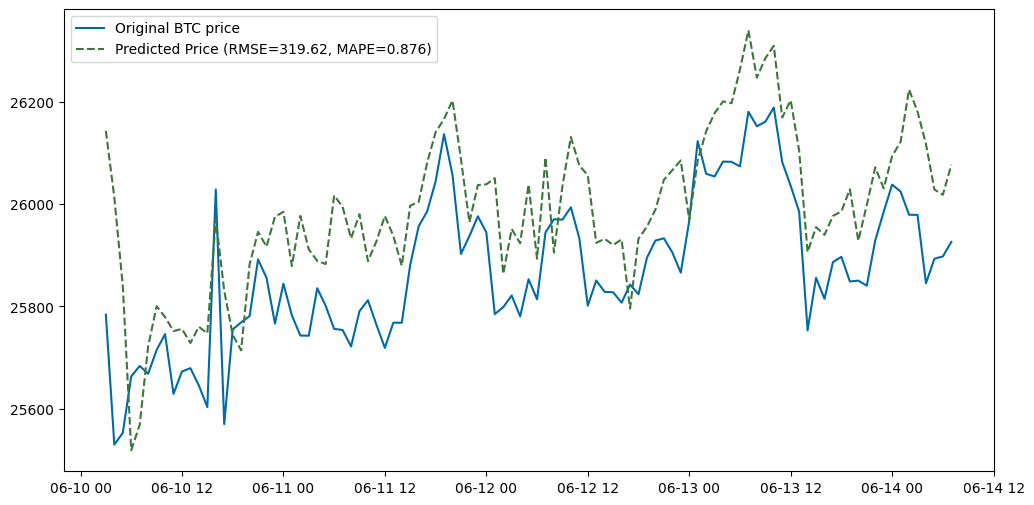

In [341]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(y_test_original[0:101], label = 'Original BTC price');
ax.plot(predicted_value[0:101], linestyle='--', color='#3c763d',
        label="Predicted Price (RMSE={:0.2f}, MAPE={:0.3f})".format(rmse_error, mdape_error)); 
ax.legend();
ax.set_title("");